In [1]:
from EBL_forecast import * 
import EBL_plots_paper as p 

Note: redshifts have been re-sorted (earliest first)


In [2]:
rho_crit = (3*H(0)**2/(8*np.pi*cu.G)).to(u.Msun*u.Mpc**-3)

# from Jose's paper
f_gg = 1 # good for axions
F_g = 0 # sets stimulated decay due to CMB - check different values


In [41]:
lambda_from_nu(nu_min_US)

<Quantity 2900. Angstrom>

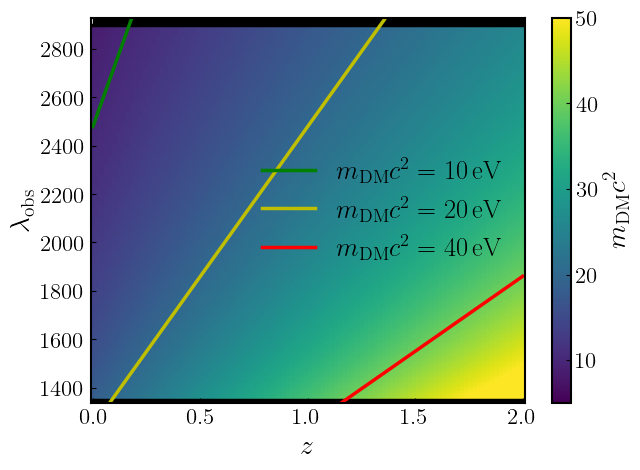

In [42]:
lambda_obs_min = lambda_from_nu(nu_max_gFUV)
lambda_obs_max = lambda_from_nu(nu_min_US)

nnu = 150
nz = 100

#mc2_DM = np.logspace(-3,3,nm) *u.eV
lambda_DM_obs = np.linspace(lambda_obs_min,lambda_obs_max,nnu)
nu_DM_obs = nu_from_lambda(lambda_DM_obs)
z_vals = np.linspace(0,2,nz)

#mc2_DM_matr = mc2_DM[:,np.newaxis]*np.ones((nm,nz))
z_vals_matr = z_vals[:,np.newaxis]*np.ones((nz,nnu))
nu_DM_obs_matr = nu_DM_obs[np.newaxis,:]*np.ones((nz,nnu))

mc2_DM = ((4*np.pi*cu.hbar) * (nu_DM_obs_matr*(1+z_vals_matr))).to(u.eV)

#nu_DM_rest = (mc2_DM_matr / (4*np.pi*cu.hbar)).to(u.Hz)
#nu_DM_obs = nu_DM_rest / (1+z_vals_matr)

plt.figure(figsize=(7,5))

#nuobs = nurest / (1+z)

plt.pcolormesh(z_vals, lambda_DM_obs.value,(mc2_DM.value).T, vmin = 5,vmax=50)  

plt.plot(z_vals,lambda_obs_min.value*np.ones(len(z_vals)),'k')
plt.plot(z_vals,lambda_obs_max.value*np.ones(len(z_vals)),'k')

lambda_obs_10eV = lambda_from_nu((10*u.eV / (4*np.pi*cu.hbar)).to(u.Hz)/ (1+z_vals))
lambda_obs_20eV = lambda_from_nu((20*u.eV / (4*np.pi*cu.hbar)).to(u.Hz)/ (1+z_vals))
lambda_obs_40eV = lambda_from_nu((40*u.eV / (4*np.pi*cu.hbar)).to(u.Hz)/ (1+z_vals))

plt.plot(z_vals,(lambda_obs_10eV.value),'g',label=r'$m_{\rm DM}c^2 = 10\,{\rm eV}$')
plt.plot(z_vals,(lambda_obs_20eV.value),'y',label=r'$m_{\rm DM}c^2 = 20\,{\rm eV}$')
plt.plot(z_vals,(lambda_obs_40eV.value),'r',label=r'$m_{\rm DM}c^2 = 40\,{\rm eV}$')

plt.ylim((lambda_DM_obs.value)[0]/1.01,(lambda_DM_obs.value)[-1]*1.01)

plt.legend(loc=7,fontsize=19)

plt.fill_between(z_vals,(lambda_obs_max.value),y2=(lambda_obs_max.value*1.1),color='k')
plt.fill_between(z_vals,(lambda_obs_min.value/1.1),y2=(lambda_obs_min.value),color='k')

plt.colorbar(label=r'$m_{\rm DM}c^2$')
plt.xlabel(r'$z$')
plt.ylabel(r'$\lambda_{\rm obs}$')

plt.savefig('results/PLOTS/EBL_DM/DM_mass.png')

In [43]:
logaddexp = lambda x,y: x + np.log(1 + np.exp(y - x)) if (x > y) else y + np.log(1 + np.exp(x - y))

sigmoid = lambda lambda_rest: np.exp(-logaddexp(0, -(lambda_rest.value - (1216*u.AA).value) / 100))

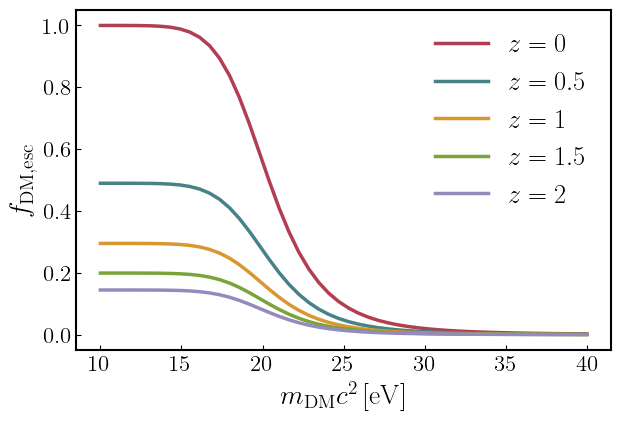

In [7]:
test_masses = np.linspace(10,40)
lambda_rest = np.zeros(len(test_masses))
sigm = np.zeros(len(test_masses))
for i in range(len(test_masses)):
    lambda_rest[i] = (lambda_from_nu((test_masses[i]*u.eV / (4*np.pi*cu.hbar)).to(u.Hz)).value)
    sigm[i] = sigmoid(lambda_rest[i]*u.Hz)
plt.figure(figsize=(7,5))
alphas = [1,0.8,0.6,0.4,0.2]
plt.plot(test_masses,sigm,alpha=alphas[0],label=r'$z = %g$'%0)
list_val = [0.5,1,1.5,2]
for i in list_val:
   plt.plot(test_masses,sigm*fLyC(i,False),label=r'$z = %g$'%i)

plt.xlabel(r'$m_{\rm DM}c^2\,[{\rm eV}]$')
plt.ylabel(r'$f_{\rm DM,esc}$')

plt.legend(loc=1,fontsize=19)
plt.tight_layout()
plt.savefig('results/PLOTS/EBL_DM/DM_esc.png')

In [44]:
nu_DM_rest_funct = lambda m_DM: (m_DM / (4*np.pi*cu.hbar)).to(u.Hz)
nu_DM_obs_funct = lambda m_DM, z: nu_DM_rest_funct(m_DM) / (1+z)

delta_val = 0.005
emissivity_intrinsic = lambda m_DM, z, f_DM_decay_DM: fLyC(z,False) * sigmoid(lambda_from_nu(nu_DM_rest_funct(m_DM))) * (f_gg * (f_DM_decay_DM*u.s**-1) * camb_pars.omegac * rho_crit * cu.c**2 * (1+F_g)/(nu_DM_rest_funct(m_DM))).to(u.erg*u.s**-1*u.Hz**-1*u.Mpc**-3) 

emissivity_obs = lambda m_DM, z, f_DM_decay_DM: emissivity_intrinsic(m_DM,z,f_DM_decay_DM) * np.exp(-tau_Lya(lambda_from_nu(nu_DM_obs_funct(m_DM,z)),z))


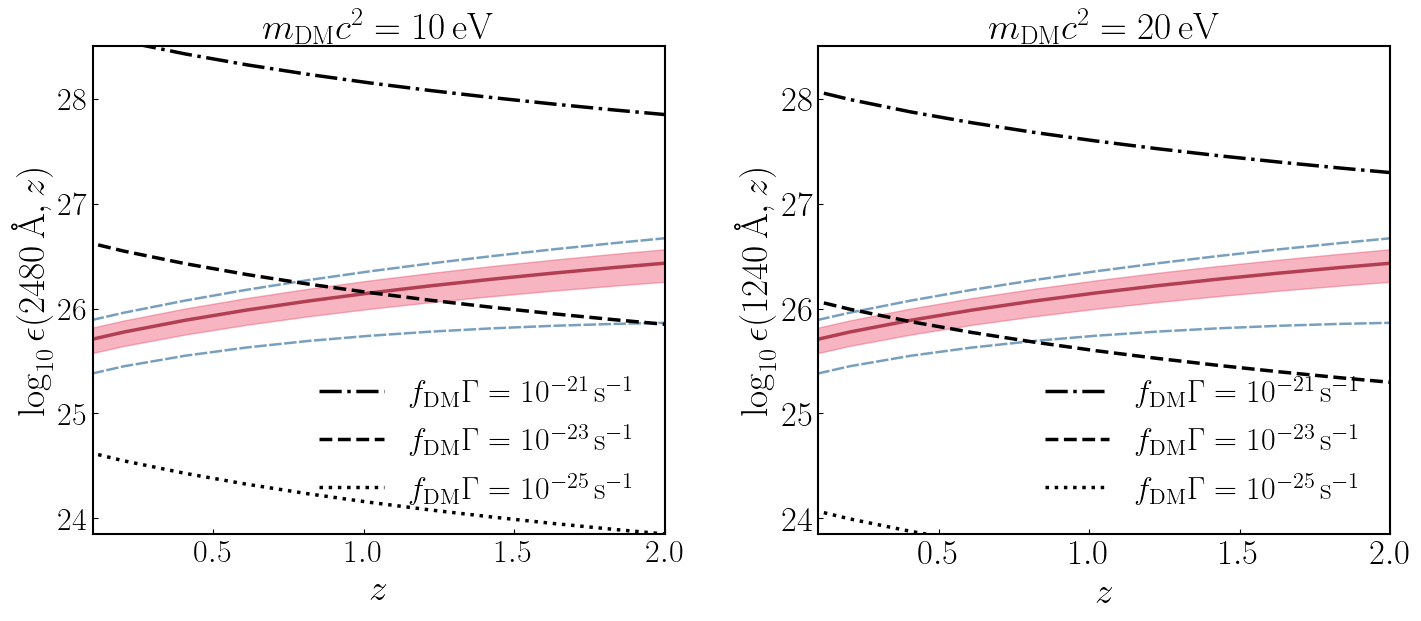

In [69]:
z_vals = np.linspace(0,10)

em_DM = np.zeros(len(z_vals))
em = np.zeros(len(z_vals))
em_DM_20 = np.zeros(len(z_vals))
em_20 = np.zeros(len(z_vals))
em_DM_40 = np.zeros(len(z_vals))
em_40 = np.zeros(len(z_vals))
#tau = np.zeros(len(z_vals))
#tau_20 = np.zeros(len(z_vals))
#tau_40 = np.zeros(len(z_vals))

use_nu_DM_rest = nu_DM_rest_funct(10*u.eV)
use_nu_DM_rest_20 = nu_DM_rest_funct(20*u.eV)
use_nu_DM_rest_40 = nu_DM_rest_funct(40*u.eV)

if use_nu_DM_rest <= nu_from_lambda(1216*u.AA):
    sigmas_nonion = p.plot_err_noninonizing_cont_wb(z_vals, lambda_from_nu(use_nu_DM_rest).value, use_pars_fid = pars_fid,group_vox=True,run=False,galex_detector='DESI',prior='conservative')[0][2]  * (70/67.67)**3
    sigmas_nonion_C18 = p.plot_err_noninonizing_cont_wb(z_vals, lambda_from_nu(use_nu_DM_rest).value, use_pars_fid = p.pars_original_c18_fid,group_vox=True,run=False,galex_detector='SDSS',prior='conservative')[0][0] * (70/67.67)**3 
else:
    print('Check errors!')
    sigmas_nonion = 0.
    sigmas_nonion_C18 = 0.

if use_nu_DM_rest_20 <= nu_from_lambda(1216*u.AA):
    sigmas_nonion_20 = p.plot_err_noninonizing_cont_wb(z_vals, lambda_from_nu(use_nu_DM_rest_20).value, use_pars_fid = pars_fid,group_vox=True,run=False,galex_detector='DESI',prior='conservative')[0][2]  * (70/67.67)**3
    sigmas_nonion_C18_20 = p.plot_err_noninonizing_cont_wb(z_vals, lambda_from_nu(use_nu_DM_rest_20).value, use_pars_fid = p.pars_original_c18_fid,group_vox=True,run=False,galex_detector='SDSS',prior='conservative')[0][0] * (70/67.67)**3 
else:
    print('Check errors!')
    sigmas_nonion_20 = 0.    
    sigmas_nonion_C18_20 = 0.
#
#if use_nu_DM_rest_40 <= nu_from_lambda(1216*u.AA):
#    sigmas_nonion_40 = p.plot_err_noninonizing_cont_wb(z_vals, lambda_from_nu(use_nu_DM_rest_40).value, use_pars_fid = pars_fid,group_vox=True,run=False,galex_detector='DESI',prior='conservative')[0][2]  * (70/67.67)**3
#    sigmas_nonion_C18_40 = p.plot_err_noninonizing_cont_wb(z_vals, lambda_from_nu(use_nu_DM_rest_40).value, use_pars_fid = p.pars_original_c18_fid,group_vox=True,run=False,galex_detector='SDSS',prior='conservative')[0][0]  * (70/67.67)**3
#else:
#    print('Check errors!')
#    sigmas_nonion_40 = 0.
#    sigmas_nonion_C18_40 = 0.
#
#
f_DM_decay_DM_1_vals = [1e-21,1e-23,1e-25]
alphas = ['-.','--',':']
plt.figure(figsize=(15,7))

plt.subplot(121)

plt.xlabel(r'$z$',fontsize=27)
plt.ylabel(r'$\log_{10}\epsilon(%g\,{\rm \AA},z)$'%round(lambda_from_nu(use_nu_DM_rest).value,0),fontsize=27)
plt.title(r'$m_{\rm DM}c^2=10\,{\rm eV}$',fontsize=27)

plt.subplot(122)

plt.xlabel(r'$z$',fontsize=27)
plt.ylabel(r'$\log_{10}\epsilon(%g\,{\rm \AA},z)$'%round(lambda_from_nu(use_nu_DM_rest_20).value,0),fontsize=27)
plt.title(r'$m_{\rm DM}c^2=20\,{\rm eV}$',fontsize=27)


for f_DM_decay_DM_1 in f_DM_decay_DM_1_vals: 
    for i in range(len(z_vals)):

        em_DM[i] = emissivity_intrinsic(10*u.eV,z_vals[i],f_DM_decay_DM_1).value
        em[i] = signal(lambda_from_nu(use_nu_DM_rest),z_vals[i],'ULTRASAT',False,False,False,False,False,False).value
        #tau[i] = np.exp(-tau_Lya(lambda_from_nu(nu_DM_obs_funct(10*u.eV,z_vals[i])),z_vals[i]))

        em_DM_20[i] = emissivity_intrinsic(20*u.eV,z_vals[i],f_DM_decay_DM_1).value
        em_20[i] = signal(lambda_from_nu(use_nu_DM_rest_20),z_vals[i],'ULTRASAT',False,False,False,False,False,False).value
        #tau_20[i] = np.exp(-tau_Lya(lambda_from_nu(nu_DM_obs_funct(20*u.eV,z_vals[i])),z_vals[i]))

        em_DM_40[i] = emissivity_intrinsic(40*u.eV,z_vals[i],f_DM_decay_DM_1).value
        em_40[i] = signal(lambda_from_nu(use_nu_DM_rest_40),z_vals[i],'ULTRASAT',False,False,False,False,False,False).value
        #tau_40[i] = np.exp(-tau_Lya(lambda_from_nu(nu_DM_obs_funct(25*u.eV,z_vals[i])),z_vals[i]))

    idx = f_DM_decay_DM_1_vals.index(f_DM_decay_DM_1)
    plt.subplot(121)
    if f_DM_decay_DM_1 == 1e-23:
        plt.plot(z_vals,np.log10(em))#,label=r'$\rm UV-EBL$')
        #plt.plot(z_vals,np.log10(em+em_DM),'k',label=r'$\rm Total\, (10^{%g}\,{\rm s^{-1}})$'%np.log10(f_DM_decay_DM_1))

        plt.fill_between(z_vals, np.log10(np.maximum(1e20,em - sigmas_nonion)), np.log10(em + sigmas_nonion), color=color_ULTRASAT, alpha = 0.4)

        plt.plot(z_vals, np.log10(np.maximum(1e20,em - sigmas_nonion_C18)),color_FUV,alpha=0.6,linestyle=(0,(5,1)),linewidth=1.8)

        plt.plot(z_vals, np.log10(em + sigmas_nonion_C18),color_FUV,alpha=0.6,linestyle=(0,(5,1)),linewidth=1.8)

    plt.plot(z_vals,np.log10(em_DM),'k',linestyle = alphas[idx],label=r'$f_{\rm DM}\Gamma = 10^{%g}\,{\rm s^{-1}}$'%np.log10(f_DM_decay_DM_1))

    plt.legend(loc=4)

    plt.ylim(23.85,28.5)
    plt.xlim(zmin_gal,zmax_gal)

    plt.subplot(122)
    if f_DM_decay_DM_1 == 1e-23:
        plt.plot(z_vals,np.log10(em))#,label=r'$\rm UV-EBL$')

        #plt.plot(z_vals,np.log10(em_20+em_DM_20),'k',label=r'$\rm Total\, (10^{%g}\,{\rm s^{-1}})$'%np.log10(f_DM_decay_DM_1))

        plt.fill_between(z_vals, np.log10(np.maximum(1e20,em - sigmas_nonion)), np.log10(em + sigmas_nonion), color=color_ULTRASAT, alpha = 0.4)

        plt.plot(z_vals, np.log10(np.maximum(1e20,em - sigmas_nonion_C18)),color_FUV,alpha=0.6,linestyle=(0,(5,1)),linewidth=1.8)

        plt.plot(z_vals, np.log10(em + sigmas_nonion_C18),color_FUV,alpha=0.6,linestyle=(0,(5,1)),linewidth=1.8)

    plt.plot(z_vals,np.log10(em_DM_20),'k',linestyle = alphas[idx],label=r'$f_{\rm DM}\Gamma = 10^{%g}\,{\rm s^{-1}}$'%np.log10(f_DM_decay_DM_1))

    plt.legend(loc=4)

    plt.ylim(23.85,28.5)
    plt.xlim(zmin_gal,zmax_gal)


plt.subplot(121)
plt.tick_params(axis='x', labelsize=23) 
plt.tick_params(axis='y', labelsize=23) 
plt.subplots_adjust(wspace=0)

plt.subplot(122)
plt.tick_params(axis='x', labelsize=25) 
plt.tick_params(axis='y', labelsize=25) 
plt.subplots_adjust(wspace=0)

plt.tight_layout()

plt.savefig('results/PLOTS/EBL_DM/DM_emissivity.png',bbox_inches='tight')

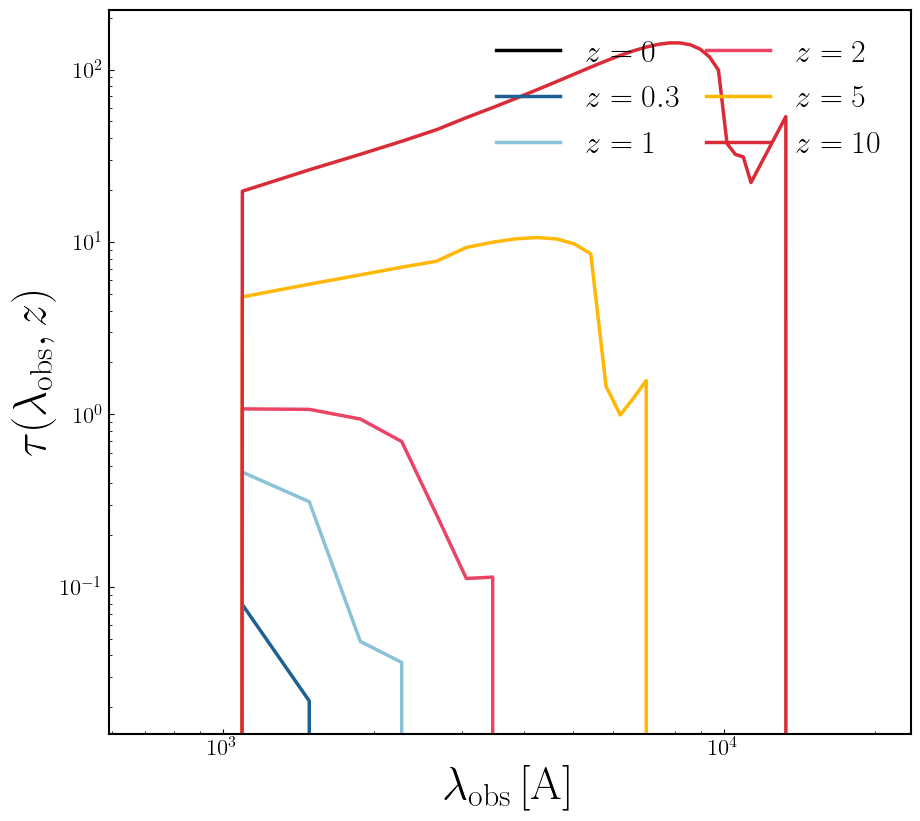

In [88]:
plot_tau()

In [100]:
m_DM_vals = np.linspace(10,50,100)*u.eV
z_vals = np.linspace(0,2,10)

nu_DM_obs_vals = np.zeros((len(z_vals),len(m_DM_vals)))
DM_intr_em_vals = np.zeros((len(z_vals),len(m_DM_vals)))
DM_obs_em_vals = np.zeros((len(z_vals),len(m_DM_vals)))
for i in range(len(z_vals)):
    for j in range(len(m_DM_vals)):
        nu_DM_obs_vals[i,j] = nu_DM_obs_funct(m_DM_vals[j],z_vals[i]).value
        DM_intr_em_vals[i,j] = emissivity_intrinsic(m_DM_vals[j],z_vals[i],1e-23).value
        DM_obs_em_vals[i,j] = emissivity_obs(m_DM_vals[j],z_vals[i],1e-23).value


Text(0, 0.5, '$m_{\\rm DM}c^2$')

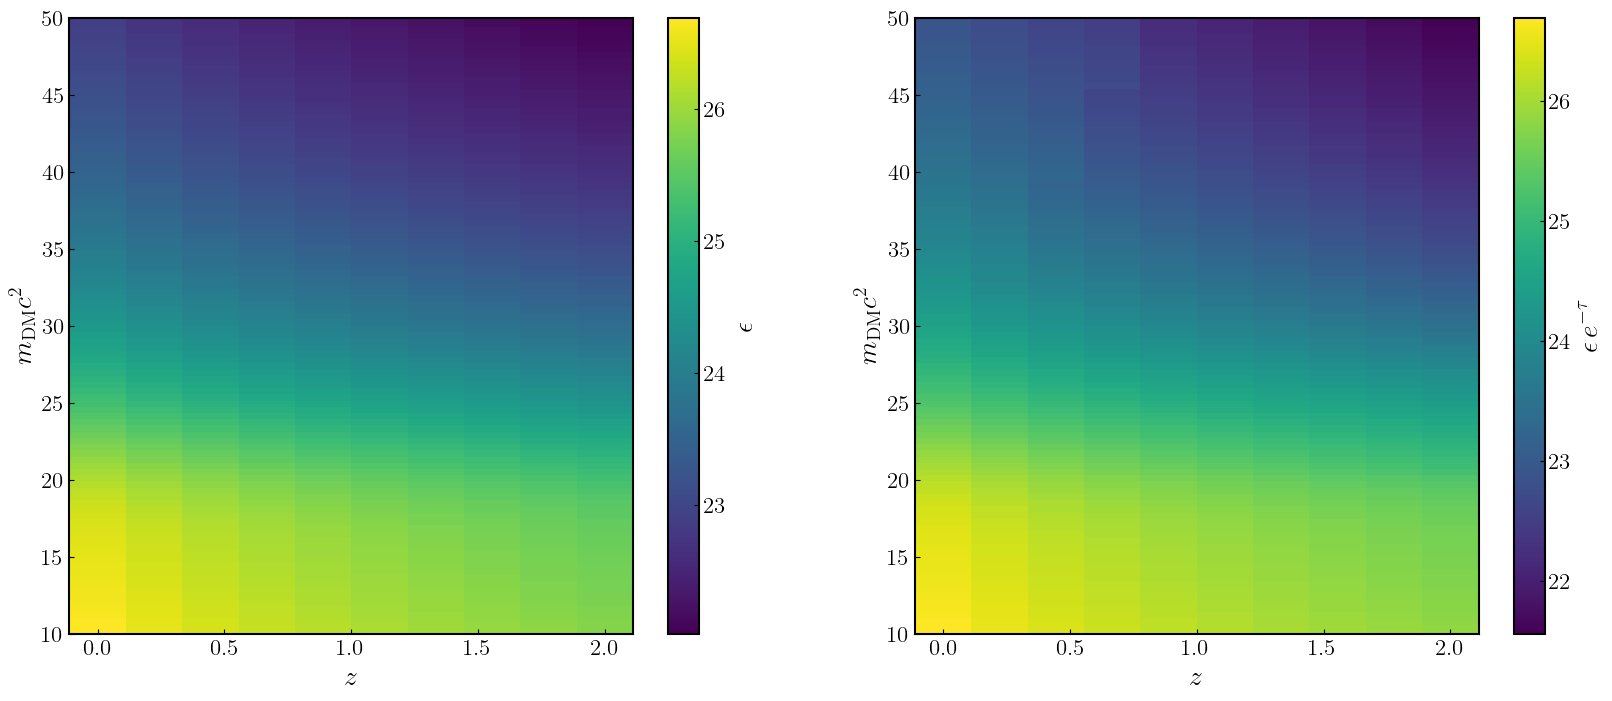

In [102]:

plt.figure(figsize=(20,8))
plt.subplot(121)

plt.pcolormesh(z_vals, (m_DM_vals.value),np.log10(DM_intr_em_vals).T)  

plt.ylim((m_DM_vals.value)[0],(m_DM_vals.value)[-1])

plt.colorbar(label=r'$\epsilon$')
plt.xlabel(r'$z$')
plt.ylabel(r'$m_{\rm DM}c^2$')

plt.subplot(122)

plt.pcolormesh(z_vals, (m_DM_vals.value),np.log10(DM_obs_em_vals).T)  

plt.ylim((m_DM_vals.value)[0],(m_DM_vals.value)[-1])

plt.colorbar(label=r'$\epsilon\,e^{-\tau}$')
plt.xlabel(r'$z$')
plt.ylabel(r'$m_{\rm DM}c^2$')

Text(0, 0.5, '$\\epsilon$')

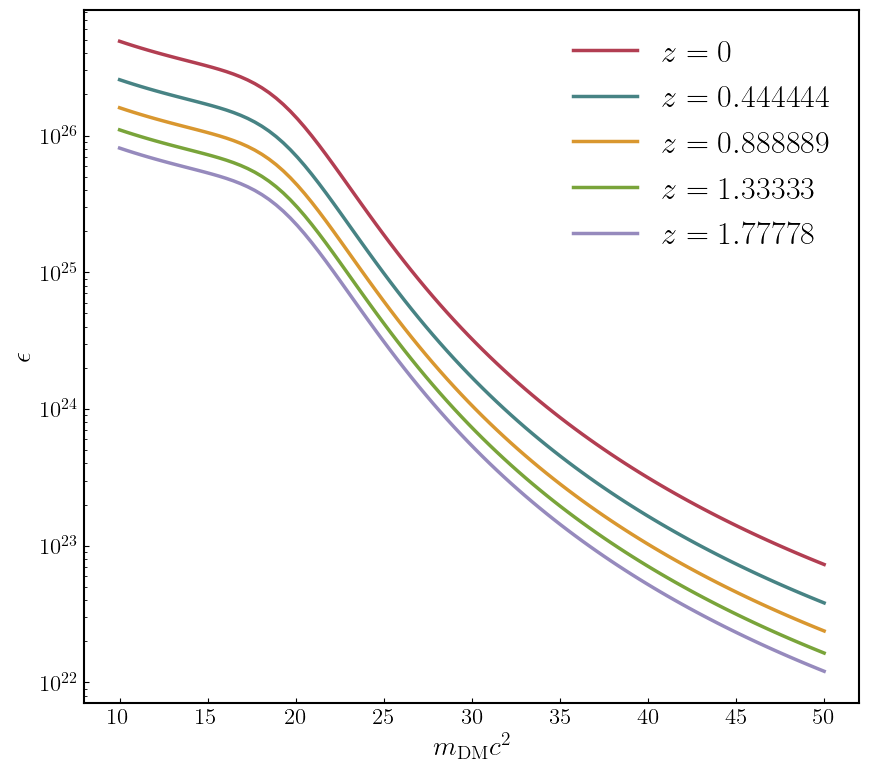

In [103]:
for i in ([0,2,4,6,8]):
    plt.semilogy(m_DM_vals,DM_intr_em_vals[i,:],label=r'$z=%g$'%z_vals[i])

plt.xlabel(r'$m_{\rm DM}c^2$')
plt.legend()
plt.ylabel(r'$\epsilon$')

Text(0, 0.5, '$\\lambda_{\\rm obs}$')

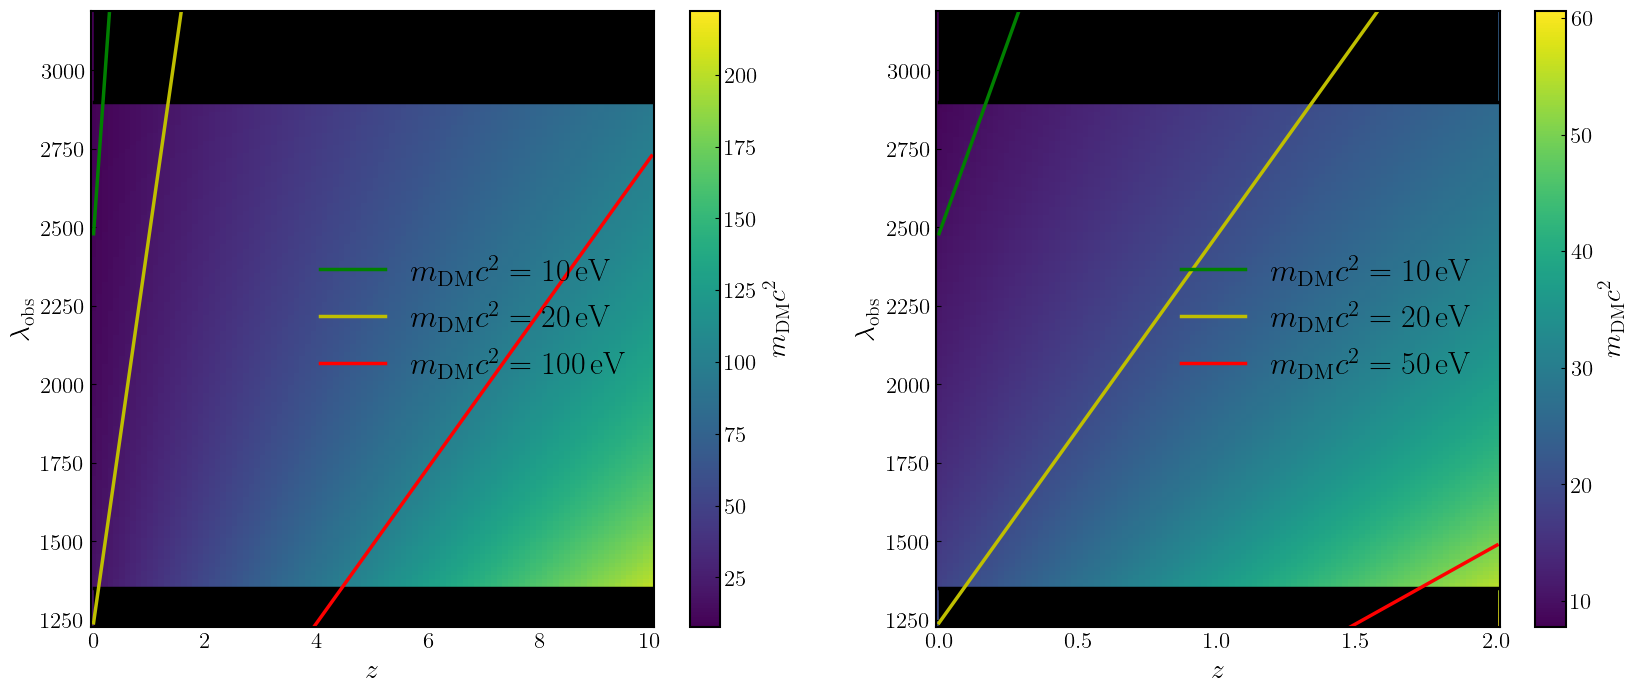

In [104]:
lambda_obs_max = lambda_from_nu(nu_min_US)
lambda_obs_min = lambda_from_nu(nu_max_gFUV)

nnu = 150
nz = 100

lambda_DM_obs = np.linspace(lambda_obs_min/1.1,lambda_obs_max*1.1,nnu)
z_vals = np.linspace(0,10,nz)

z_vals_matr = z_vals[:,np.newaxis]*np.ones((nz,nnu))
lambda_DM_obs_matr = lambda_DM_obs[np.newaxis,:]*np.ones((nz,nnu))

mc2_DM = ((4*np.pi*cu.hbar) * (nu_from_lambda(lambda_DM_obs_matr)*(1+z_vals_matr))).to(u.eV)

plt.figure(figsize=(20,8))
plt.subplot(121)
plt.pcolormesh(z_vals, (lambda_DM_obs.value),(mc2_DM.value).T)  

plt.plot(z_vals,(lambda_obs_min.value)*np.ones(len(z_vals)),'k')
plt.plot(z_vals,(lambda_obs_max.value)*np.ones(len(z_vals)),'k')

lambda_obs_10eV = lambda_from_nu((10*u.eV / (4*np.pi*cu.hbar)).to(u.Hz) / (1+z_vals))
lambda_obs_20eV = lambda_from_nu((20*u.eV / (4*np.pi*cu.hbar)).to(u.Hz) / (1+z_vals))
lambda_obs_100eV =lambda_from_nu( (100*u.eV / (4*np.pi*cu.hbar)).to(u.Hz) / (1+z_vals))

plt.plot(z_vals,(lambda_obs_10eV.value),'g',label=r'$m_{\rm DM}c^2 = 10\,{\rm eV}$')
plt.plot(z_vals,(lambda_obs_20eV.value),'y',label=r'$m_{\rm DM}c^2 = 20\,{\rm eV}$')
plt.plot(z_vals,(lambda_obs_100eV.value),'r',label=r'$m_{\rm DM}c^2 = 100\,{\rm eV}$')

plt.ylim((lambda_DM_obs.value)[0],(lambda_DM_obs.value)[-1])

plt.legend(loc=7)

plt.fill_between(z_vals,(lambda_obs_max.value),y2=(lambda_obs_max.value*1.1),color='k')
plt.fill_between(z_vals,(lambda_obs_min.value/1.1),y2=(lambda_obs_min.value),color='k')

plt.colorbar(label=r'$m_{\rm DM}c^2$')
plt.xlabel(r'$z$')
plt.ylabel(r'$\lambda_{\rm obs}$')

plt.subplot(122)

lambda_DM_obs = np.linspace(lambda_obs_min/1.1,lambda_obs_max*1.1,nnu)
z_vals = np.linspace(0,2.,nz)

lambda_obs_10eV = lambda_from_nu((10*u.eV / (4*np.pi*cu.hbar)).to(u.Hz) / (1+z_vals))
lambda_obs_20eV = lambda_from_nu((20*u.eV / (4*np.pi*cu.hbar)).to(u.Hz) / (1+z_vals))
lambda_obs_50eV = lambda_from_nu((50*u.eV / (4*np.pi*cu.hbar)).to(u.Hz) / (1+z_vals))

z_vals_matr = z_vals[:,np.newaxis]*np.ones((nz,nnu))
lambda_DM_obs_matr = lambda_DM_obs[np.newaxis,:]*np.ones((nz,nnu))

mc2_DM = ((4*np.pi*cu.hbar) * (nu_from_lambda(lambda_DM_obs_matr)*(1+z_vals_matr))).to(u.eV)

plt.pcolormesh(z_vals, (lambda_DM_obs.value),(mc2_DM.value).T)  

plt.plot(z_vals,(lambda_obs_min.value)*np.ones(len(z_vals)),'k')
plt.plot(z_vals,(lambda_obs_max.value)*np.ones(len(z_vals)),'k')

lambda_obs_20eV = lambda_from_nu((20*u.eV / (4*np.pi*cu.hbar)).to(u.Hz) / (1+z_vals))
lambda_obs_100eV =lambda_from_nu( (100*u.eV / (4*np.pi*cu.hbar)).to(u.Hz) / (1+z_vals))
lambda_obs_10eV = lambda_from_nu((10*u.eV / (4*np.pi*cu.hbar)).to(u.Hz) / (1+z_vals))

plt.plot(z_vals,(lambda_obs_10eV.value),'g',label=r'$m_{\rm DM}c^2 = 10\,{\rm eV}$')
plt.plot(z_vals,(lambda_obs_20eV.value),'y',label=r'$m_{\rm DM}c^2 = 20\,{\rm eV}$')
plt.plot(z_vals,(lambda_obs_50eV.value),'r',label=r'$m_{\rm DM}c^2 = 50\,{\rm eV}$')

plt.ylim((lambda_DM_obs.value)[0],(lambda_DM_obs.value)[-1])

plt.legend(loc=7)

plt.fill_between(z_vals,(lambda_obs_max.value),y2=(lambda_obs_max.value*1.1),color='k')
plt.fill_between(z_vals,(lambda_obs_min.value/1.1),y2=(lambda_obs_min.value),color='k')

plt.colorbar(label=r'$m_{\rm DM}c^2$')
plt.xlabel(r'$z$')
plt.ylabel(r'$\lambda_{\rm obs}$')